In [1]:
#import libraries 
from shapely.geometry import Point, LineString
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
import numpy as np
import json

In [67]:
may_df = pd.read_csv('./scooter_data/may_trip.csv')
may_df.head()

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt
0,2019-05-01 00:00:55.423000,Bird,BRD2134,Powered9EAJL,3.0000,958.00528,2019-05-01 00:00:00,00:00:20.460000,2019-05-01 00:00:00,00:02:52.346666,36.15710,-86.80360,36.15660,-86.80670,"[[36.157235,-86.803612],[36.157235,-86.80362],...",2019-05-02 05:30:23.780000
1,2019-05-01 00:03:33.147000,Lyft,LFT5,Powered296631,1.7156,1371.39112,2019-05-01 00:00:00,00:01:50.090000,2019-05-01 00:00:00,00:03:33.026666,36.15797,-86.77896,36.16054,-86.77689,"[[36.15797,-86.77896],[36.15795,-86.77873],[36...",2019-05-02 07:20:32.757000
2,2019-05-01 00:05:55.570000,Bird,BRD2168,Powered7S2UU,3.0000,2296.58800,2019-05-01 00:00:00,00:03:47.363333,2019-05-01 00:00:00,00:07:13.596666,36.15470,-86.78180,36.15650,-86.78680,"[[36.155068,-86.782124],[36.156597,-86.78675]]",2019-05-02 05:30:24.530000
3,2019-05-01 00:05:55.570000,Bird,BRD2166,PoweredZIIVX,3.0000,1200.78744,2019-05-01 00:00:00,00:04:21.386666,2019-05-01 00:00:00,00:06:59.176666,36.14940,-86.77950,36.15310,-86.77960,"[[36.149741,-86.779344],[36.149741,-86.779327]...",2019-05-02 05:30:24.237000
4,2019-05-01 00:05:55.570000,Bird,BRD2165,PoweredJ7MB3,2.0000,351.04988,2019-05-01 00:00:00,00:04:27.796666,2019-05-01 00:00:00,00:06:23.150000,36.17780,-86.78660,36.17740,-86.78760,"[[36.177699,-86.786477],[36.177711,-86.786469]...",2019-05-02 05:30:24.207000


In [3]:
may_df.tripRecordNum.value_counts()

LIM435      31
LIM1180     31
LIM280      31
LIM656      31
LIM575      31
LIM911      31
LIM1802     31
LIM898      31
LFT684      31
LIM1474     31
LFT744      31
LIM678      31
LIM1215     31
LIM861      31
LIM1268     31
LIM1714     31
LIM1991     31
LIM799      31
LIM212      31
LIM1671     31
LIM1070     31
LIM350      31
LIM1367     31
LIM496      31
LIM1818     31
LFT177      31
LIM975      31
LIM328      31
LIM1276     31
LIM1343     31
            ..
BOL01005     1
LIM6916      1
LIM6412      1
SPI1368      1
BRD6934      1
BRD9040      1
LIM5799      1
BRD10078     1
LFT3588      1
BRD8284      1
BRD9652      1
BRD8279      1
LIM6796      1
LFT3521      1
SPI1431      1
LIM6037      1
BRD10038     1
LFT2989      1
LIM6646      1
LIM6167      1
BRD8354      1
LFT3019      1
BRD5896      1
BRD7701      1
SPI1420      1
JMP825       1
BRD6413      1
BRD4729      1
BRD8906      1
BRD10179     1
Name: tripRecordNum, Length: 23226, dtype: int64

In [4]:
may_df.companyName.value_counts()

Lime             102569
Lyft              54271
Bird              53496
SPIN               8471
Bolt Mobility      4912
Gotcha              650
JUMP                600
Name: companyName, dtype: int64

In [5]:
may_df.sumdID.value_counts()

PoweredUNKNOWN                                 2166
Poweredb671ffe4-2bca-5880-98ec-d36f65aa11a2     600
PoweredWVIAXNCVDNOXP                            338
PoweredR3QXO6TL2HIAB                            291
PoweredRJ7YYJTHAR5N3                            274
PoweredEGRN7CFK6Q6K2                            261
PoweredDJQATZBXPBUAE                            254
PoweredLNAVSI3QKRPVH                            225
Powered75MFAMZCCD3QJ                            222
PoweredKCXMXKUIP3Z4E                            221
PoweredGVLQSJDAXWVPX                            200
Powered7F7SGZH42ZGS7                            196
Powered34ZSQ3V4KEPAS                            195
PoweredRRC5FV6DYYHBL                            193
Powered4FCVKYQ3DTH7H                            191
PoweredLABZO3C5YHDP4                            186
Powered4WOKR5XFN26KV                            185
Powered3XINKE5ALW66Z                            184
PoweredJVORYRHLCRMDH                            180
Powered3SDFC

In [68]:
may_trip = may_df.query('tripDistance > 1320')
may_trip.head()

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt
1,2019-05-01 00:03:33.147000,Lyft,LFT5,Powered296631,1.7156,1371.39112,2019-05-01 00:00:00,00:01:50.090000,2019-05-01 00:00:00,00:03:33.026666,36.15797,-86.77896,36.16054,-86.77689,"[[36.15797,-86.77896],[36.15795,-86.77873],[36...",2019-05-02 07:20:32.757000
2,2019-05-01 00:05:55.570000,Bird,BRD2168,Powered7S2UU,3.0000,2296.58800,2019-05-01 00:00:00,00:03:47.363333,2019-05-01 00:00:00,00:07:13.596666,36.15470,-86.78180,36.15650,-86.78680,"[[36.155068,-86.782124],[36.156597,-86.78675]]",2019-05-02 05:30:24.530000
8,2019-05-01 00:10:56.013000,Bird,BRD2193,PoweredSX2AW,6.0000,2624.67200,2019-05-01 00:00:00,00:06:34.436666,2019-05-01 00:00:00,00:12:48.676666,36.17080,-86.78930,36.17460,-86.78600,"[[36.170995,-86.789593],[36.173193,-86.791207]...",2019-05-02 05:30:24.833000
9,2019-05-01 00:10:56.013000,Bird,BRD2194,PoweredL968V,6.0000,2624.67200,2019-05-01 00:00:00,00:05:36.870000,2019-05-01 00:00:00,00:11:19.183333,36.15650,-86.79710,36.15120,-86.79680,"[[36.15654,-86.797137],[36.153065,-86.798047],...",2019-05-02 05:30:24.920000
11,2019-05-01 00:10:56.013000,Bird,BRD2192,Powered9DC3R,5.0000,1968.50400,2019-05-01 00:00:00,00:07:37.766666,2019-05-01 00:00:00,00:12:13.596666,36.15160,-86.81220,36.15190,-86.81440,"[[36.151608,-86.811971],[36.151675,-86.81214],...",2019-05-02 05:30:24.737000


In [69]:
may_trip_duration=may_trip.query('5<=tripDuration<=120')
may_trip_duration.head()

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt
8,2019-05-01 00:10:56.013000,Bird,BRD2193,PoweredSX2AW,6.0,2624.672,2019-05-01 00:00:00,00:06:34.436666,2019-05-01 00:00:00,00:12:48.676666,36.1708,-86.7893,36.1746,-86.7860,"[[36.170995,-86.789593],[36.173193,-86.791207]...",2019-05-02 05:30:24.833000
9,2019-05-01 00:10:56.013000,Bird,BRD2194,PoweredL968V,6.0,2624.672,2019-05-01 00:00:00,00:05:36.870000,2019-05-01 00:00:00,00:11:19.183333,36.1565,-86.7971,36.1512,-86.7968,"[[36.15654,-86.797137],[36.153065,-86.798047],...",2019-05-02 05:30:24.920000
11,2019-05-01 00:10:56.013000,Bird,BRD2192,Powered9DC3R,5.0,1968.504,2019-05-01 00:00:00,00:07:37.766666,2019-05-01 00:00:00,00:12:13.596666,36.1516,-86.8122,36.1519,-86.8144,"[[36.151608,-86.811971],[36.151675,-86.81214],...",2019-05-02 05:30:24.737000
12,2019-05-01 00:10:56.013000,Bird,BRD2197,Powered5R8S1,9.0,3280.840,2019-05-01 00:00:00,00:01:50.923333,2019-05-01 00:00:00,00:11:03.403333,36.1614,-86.7760,36.1567,-86.7808,"[[36.161623,-86.776131],[36.161411,-86.776082]...",2019-05-02 05:30:25.087000
14,2019-05-01 00:10:56.013000,Bird,BRD2195,Powered2AQ14,6.0,4921.260,2019-05-01 00:00:00,00:05:30.423333,2019-05-01 00:00:00,00:11:55.403333,36.1658,-86.7803,36.1683,-86.7676,"[[36.165862,-86.780524],[36.165631,-86.779799]...",2019-05-02 05:30:24.970000


In [70]:
may_day_range = may_trip_duration.query('"2019-05-03 00:00:00"<=startDate<="2019-05-06 00:00:00"')
may_day_range.head()

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt
8757,2019-05-03 00:07:20.837000,Lyft,LFT17,Powered278313,6.166633,3218.50404,2019-05-03 00:00:00,00:01:10.733333,2019-05-03 00:00:00,00:07:20.730000,36.16458,-86.77691,36.15707,-86.77446,"[[36.16458,-86.77691],[36.16457,-86.777],[36.1...",2019-05-04 07:29:10.067000
8761,2019-05-03 00:08:05.667000,Bird,BRD2952,PoweredHHISN,5.000000,1640.42000,2019-05-03 00:00:00,00:04:27.270000,2019-05-03 00:00:00,00:09:45.263333,36.15080,-86.78210,36.15400,-86.78480,"[[36.150855,-86.782041],[36.151102,-86.782375]...",2019-05-04 05:30:20.290000
8763,2019-05-03 00:08:05.667000,Bird,BRD2956,PoweredJDCIU,9.000000,2106.29928,2019-05-03 00:00:00,00:00:39.353333,2019-05-03 00:00:00,00:09:19.216666,36.16440,-86.77700,36.15970,-86.77490,"[[36.164501,-86.776544],[36.16452,-86.776544],...",2019-05-04 05:30:20.410000
8766,2019-05-03 00:08:05.667000,Bird,BRD2953,PoweredVV385,5.000000,3280.84000,2019-05-03 00:00:00,00:04:18.616666,2019-05-03 00:00:00,00:09:11.550000,36.16250,-86.79120,36.16580,-86.78240,"[[36.162589,-86.791206],[36.165895,-86.782318]]",2019-05-04 05:30:20.320000
8771,2019-05-03 00:08:05.667000,Bird,BRD2955,Powered49YWT,7.000000,1640.42000,2019-05-03 00:00:00,00:02:25.030000,2019-05-03 00:00:00,00:09:11.583333,36.16310,-86.77670,36.16280,-86.77670,"[[36.162752,-86.77644],[36.162534,-86.776635],...",2019-05-04 05:30:20.380000


In [71]:
may_day_range_filtered = may_day_range.query('endDate<"2019-05-07 00:00:00"')
may_day_range_filtered.head()

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt
8757,2019-05-03 00:07:20.837000,Lyft,LFT17,Powered278313,6.166633,3218.50404,2019-05-03 00:00:00,00:01:10.733333,2019-05-03 00:00:00,00:07:20.730000,36.16458,-86.77691,36.15707,-86.77446,"[[36.16458,-86.77691],[36.16457,-86.777],[36.1...",2019-05-04 07:29:10.067000
8761,2019-05-03 00:08:05.667000,Bird,BRD2952,PoweredHHISN,5.000000,1640.42000,2019-05-03 00:00:00,00:04:27.270000,2019-05-03 00:00:00,00:09:45.263333,36.15080,-86.78210,36.15400,-86.78480,"[[36.150855,-86.782041],[36.151102,-86.782375]...",2019-05-04 05:30:20.290000
8763,2019-05-03 00:08:05.667000,Bird,BRD2956,PoweredJDCIU,9.000000,2106.29928,2019-05-03 00:00:00,00:00:39.353333,2019-05-03 00:00:00,00:09:19.216666,36.16440,-86.77700,36.15970,-86.77490,"[[36.164501,-86.776544],[36.16452,-86.776544],...",2019-05-04 05:30:20.410000
8766,2019-05-03 00:08:05.667000,Bird,BRD2953,PoweredVV385,5.000000,3280.84000,2019-05-03 00:00:00,00:04:18.616666,2019-05-03 00:00:00,00:09:11.550000,36.16250,-86.79120,36.16580,-86.78240,"[[36.162589,-86.791206],[36.165895,-86.782318]]",2019-05-04 05:30:20.320000
8771,2019-05-03 00:08:05.667000,Bird,BRD2955,Powered49YWT,7.000000,1640.42000,2019-05-03 00:00:00,00:02:25.030000,2019-05-03 00:00:00,00:09:11.583333,36.16310,-86.77670,36.16280,-86.77670,"[[36.162752,-86.77644],[36.162534,-86.776635],...",2019-05-04 05:30:20.380000


In [72]:
may_day_range_rand_filtered = may_day_range_filtered.sample(frac=.004)
may_day_range_rand_filtered.head()


,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt
37598,2019-05-06 15:57:30.967000,Bird,BRD490,PoweredPKTX4,33.00,18700.78800,2019-05-06 00:00:00,15:25:53.913333,2019-05-06 00:00:00,15:59:22.396666,36.16180,-86.77270,36.15680,-86.7807,"[[36.161897,-86.772656],[36.163609,-86.770198]...",2019-05-07 05:31:03.337000
40712,2019-05-06 22:52:50.623000,Bird,BRD2215,PoweredHL5QS,28.00,8202.10000,2019-05-06 00:00:00,22:25:26.976666,2019-05-06 00:00:00,22:53:26.830000,36.17300,-86.79760,36.17700,-86.8056,"[[36.172906,-86.79756],[36.172843,-86.797761],...",2019-05-07 05:31:27.077000
11241,2019-05-03 06:21:33.267000,Lyft,LFT834,Powered131775,38.28,22332.67788,2019-05-03 00:00:00,05:43:16.380000,2019-05-03 00:00:00,06:21:33.180000,36.17373,-86.78541,36.16412,-86.7696,"[[36.17373,-86.78541],[36.17369,-86.78531],[36...",2019-05-04 07:29:39.223000
16901,2019-05-04 03:19:31.853000,Bird,BRD5184,PoweredTBDH1,21.00,6561.68000,2019-05-04 00:00:00,02:59:04.276666,2019-05-04 00:00:00,03:19:47.210000,36.15610,-86.76520,36.16080,-86.7733,"[[36.156018,-86.765089],[36.156042,-86.765081]...",2019-05-05 05:30:42.387000
27062,2019-05-05 03:20:46.353000,Bird,BRD5974,PoweredX76D2,38.00,12467.19200,2019-05-05 00:00:00,02:44:25.760000,2019-05-05 00:00:00,03:22:07.040000,36.15010,-86.79630,36.15950,-86.7803,"[[36.150194,-86.79626],[36.15008,-86.796522],[...",2019-05-06 05:30:30.690000


In [73]:
may_groups = may_day_range_rand_filtered.groupby('companyName')['sumdID'].nunique()
may_groups

companyName
Bird    21
Lime     4
Lyft    24
Name: sumdID, dtype: int64

In [74]:
neighborhoods = gpd.read_file('scooter_data/Neighborhood Association Boundaries (GIS)-copy1.geojson')
neighborhoods.head()

,name,geometry
0,Historic Buena Vista,(POLYGON ((-86.79511056795417 36.1757596496334...
1,Charlotte Park,(POLYGON ((-86.87459668651866 36.1575770268129...
2,Hillwood,(POLYGON ((-86.87613708067906 36.1355409894979...
3,West Meade,"(POLYGON ((-86.9038380396094 36.1255414807897,..."
4,White Bridge,(POLYGON ((-86.86321427797685 36.1288622289404...


In [75]:
may_day_range_rand_filtered['geometry'] = may_day_range_rand_filtered.apply(lambda x: Point((float(x.startLongitude), float(x.startLatitude))), axis=1)
may_day_range_rand_filtered.head()

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt,geometry
37598,2019-05-06 15:57:30.967000,Bird,BRD490,PoweredPKTX4,33.00,18700.78800,2019-05-06 00:00:00,15:25:53.913333,2019-05-06 00:00:00,15:59:22.396666,36.16180,-86.77270,36.15680,-86.7807,"[[36.161897,-86.772656],[36.163609,-86.770198]...",2019-05-07 05:31:03.337000,POINT (-86.7727 36.1618)
40712,2019-05-06 22:52:50.623000,Bird,BRD2215,PoweredHL5QS,28.00,8202.10000,2019-05-06 00:00:00,22:25:26.976666,2019-05-06 00:00:00,22:53:26.830000,36.17300,-86.79760,36.17700,-86.8056,"[[36.172906,-86.79756],[36.172843,-86.797761],...",2019-05-07 05:31:27.077000,POINT (-86.7976 36.173)
11241,2019-05-03 06:21:33.267000,Lyft,LFT834,Powered131775,38.28,22332.67788,2019-05-03 00:00:00,05:43:16.380000,2019-05-03 00:00:00,06:21:33.180000,36.17373,-86.78541,36.16412,-86.7696,"[[36.17373,-86.78541],[36.17369,-86.78531],[36...",2019-05-04 07:29:39.223000,POINT (-86.78541 36.17373)
16901,2019-05-04 03:19:31.853000,Bird,BRD5184,PoweredTBDH1,21.00,6561.68000,2019-05-04 00:00:00,02:59:04.276666,2019-05-04 00:00:00,03:19:47.210000,36.15610,-86.76520,36.16080,-86.7733,"[[36.156018,-86.765089],[36.156042,-86.765081]...",2019-05-05 05:30:42.387000,POINT (-86.76519999999999 36.1561)
27062,2019-05-05 03:20:46.353000,Bird,BRD5974,PoweredX76D2,38.00,12467.19200,2019-05-05 00:00:00,02:44:25.760000,2019-05-05 00:00:00,03:22:07.040000,36.15010,-86.79630,36.15950,-86.7803,"[[36.150194,-86.79626],[36.15008,-86.796522],[...",2019-05-06 05:30:30.690000,POINT (-86.7963 36.1501)


In [76]:
scooter_geo = gpd.GeoDataFrame(may_day_range_rand_filtered, crs = neighborhoods.crs, geometry = may_day_range_rand_filtered['geometry'])
scooter_geo.head()

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt,geometry
37598,2019-05-06 15:57:30.967000,Bird,BRD490,PoweredPKTX4,33.00,18700.78800,2019-05-06 00:00:00,15:25:53.913333,2019-05-06 00:00:00,15:59:22.396666,36.16180,-86.77270,36.15680,-86.7807,"[[36.161897,-86.772656],[36.163609,-86.770198]...",2019-05-07 05:31:03.337000,POINT (-86.7727 36.1618)
40712,2019-05-06 22:52:50.623000,Bird,BRD2215,PoweredHL5QS,28.00,8202.10000,2019-05-06 00:00:00,22:25:26.976666,2019-05-06 00:00:00,22:53:26.830000,36.17300,-86.79760,36.17700,-86.8056,"[[36.172906,-86.79756],[36.172843,-86.797761],...",2019-05-07 05:31:27.077000,POINT (-86.7976 36.173)
11241,2019-05-03 06:21:33.267000,Lyft,LFT834,Powered131775,38.28,22332.67788,2019-05-03 00:00:00,05:43:16.380000,2019-05-03 00:00:00,06:21:33.180000,36.17373,-86.78541,36.16412,-86.7696,"[[36.17373,-86.78541],[36.17369,-86.78531],[36...",2019-05-04 07:29:39.223000,POINT (-86.78541 36.17373)
16901,2019-05-04 03:19:31.853000,Bird,BRD5184,PoweredTBDH1,21.00,6561.68000,2019-05-04 00:00:00,02:59:04.276666,2019-05-04 00:00:00,03:19:47.210000,36.15610,-86.76520,36.16080,-86.7733,"[[36.156018,-86.765089],[36.156042,-86.765081]...",2019-05-05 05:30:42.387000,POINT (-86.76519999999999 36.1561)
27062,2019-05-05 03:20:46.353000,Bird,BRD5974,PoweredX76D2,38.00,12467.19200,2019-05-05 00:00:00,02:44:25.760000,2019-05-05 00:00:00,03:22:07.040000,36.15010,-86.79630,36.15950,-86.7803,"[[36.150194,-86.79626],[36.15008,-86.796522],[...",2019-05-06 05:30:30.690000,POINT (-86.7963 36.1501)


In [77]:
scooter_area = gpd.sjoin(scooter_geo, neighborhoods, op = 'within')
scooter_area.head()

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt,geometry,index_right,name
40712,2019-05-06 22:52:50.623000,Bird,BRD2215,PoweredHL5QS,28.000000,8202.10000,2019-05-06 00:00:00,22:25:26.976666,2019-05-06 00:00:00,22:53:26.830000,36.17300,-86.79760,36.17700,-86.80560,"[[36.172906,-86.79756],[36.172843,-86.797761],...",2019-05-07 05:31:27.077000,POINT (-86.7976 36.173),0,Historic Buena Vista
35141,2019-05-06 00:46:45.623000,Bird,BRD4907,Powered8MPRF,8.000000,3280.84000,2019-05-06 00:00:00,00:40:17.133333,2019-05-06 00:00:00,00:48:10.186666,36.11940,-86.78960,36.11960,-86.78970,"[[36.119526,-86.789742],[36.119173,-86.789448]...",2019-05-07 05:30:22.880000,POINT (-86.78959999999999 36.1194),223,Sunnyside
23494,2019-05-04 20:38:05.617000,Lyft,LFT1717,Powered623986,31.180767,10295.27592,2019-05-04 00:00:00,20:06:54.666666,2019-05-04 00:00:00,20:38:05.513333,36.16118,-86.77751,36.16419,-86.76956,"[[36.16118,-86.77751],[36.16123,-86.77752],[36...",2019-05-05 08:34:45.680000,POINT (-86.77751000000001 36.16118),41,Urban Residents
39512,2019-05-06 20:25:20.783000,Lyft,LFT1406,Powered143493,6.833783,1528.87144,2019-05-06 00:00:00,20:18:30.656666,2019-05-06 00:00:00,20:25:20.683333,36.15867,-86.77710,36.16077,-86.77544,"[[36.15867,-86.7771],[36.1587,-86.77716],[36.1...",2019-05-07 08:19:43.860000,POINT (-86.7771 36.15867),41,Urban Residents
40561,2019-05-06 22:29:27.620000,Lyft,LFT1708,Powered581355,30.219800,16840.55172,2019-05-06 00:00:00,21:59:14.313333,2019-05-06 00:00:00,22:29:27.503333,36.16278,-86.77577,36.16431,-86.76935,"[[36.16278,-86.77577],[36.16274,-86.77581],[36...",2019-05-07 08:19:54.730000,POINT (-86.77576999999999 36.16278),41,Urban Residents


In [78]:
center = [36.161278209287914, -86.77756457127047]
map_downtown = folium.Map(location =  center, zoom_start = 15)
map_downtown
for row in scooter_area.iterrows():
   row_values = row[1]
   location = [row_values['startLatitude'], row_values['startLongitude']]
   popup = (str(row_values['sumdID']) + ': ' +
            str(row_values['tripRecordNum']) + '<br/>' +
            str(row_values['startTime'])).replace("'", "`")
   marker = folium.Marker(location = location)
   marker.add_to(map_downtown)
map_downtown
downtown = gpd.read_file('./MDHA_Promise_Zones/Export_Output_5.shp')
downtown.loc[0,'geometry']
folium.GeoJson(downtown).add_to(map_downtown)
map_downtown

In [79]:
downtown = gpd.read_file('./MDHA_Promise_Zones/Export_Output_5.shp')


In [80]:
downtown.geometry = downtown.geometry.to_crs(epsg=4326)

In [81]:
m = folium.Map([36.161278209287914, -86.77756457127047], zoom_start=11)
for _, row in scooter_area.iterrows():
              
    trip = str(row['tripRecordNum'])
    scooter_id = str(row['sumdID'])
    start_loc = [row['startLatitude'],row['startLongitude']]
    start_time = str(row['startTime'])
    
    start_marker = folium.Marker(location=start_loc, 
                popup = scooter_id + ': ' + trip + '<br/>' + start_time,
                    icon = folium.Icon(color='green'))
    start_marker.add_to(m)
    
   
    folium.Marker([row['endLatitude'], row['endLongitude']],
                       icon=folium.Icon(color='red')).add_to(m)
    
    folium.PolyLine([[row['startLatitude'], row['startLongitude']],
                    [row['endLatitude'], row['endLongitude']]], color="red").add_to(m)


folium.GeoJson(downtown).add_to(m)
m

In [82]:
may_cinco = may_day_range_filtered.query('startDate < "2019-05-06" & startDate >= "2019-05-05" & endDate < "2019-05-06"')
may_cinco.head()

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt
26679,2019-05-05 00:15:37.010000,Bird,BRD5647,PoweredX76D2,8.000000,1640.42000,2019-05-05 00:00:00,00:08:34.156666,2019-05-05 00:00:00,00:16:54.646666,36.15090,-86.78190,36.15170,-86.77970,"[[36.154863,-86.777018],[36.154934,-86.776911]...",2019-05-06 05:30:23.590000
26688,2019-05-05 00:18:21.677000,Lyft,LFT34,Powered553364,10.719000,7283.46480,2019-05-05 00:00:00,00:07:38.446666,2019-05-05 00:00:00,00:18:21.586666,36.15689,-86.77475,36.16956,-86.75897,"[[36.15689,-86.77475],[36.15684,-86.77475],[36...",2019-05-06 07:27:29.787000
26707,2019-05-05 00:20:06.917000,Lyft,LFT39,Powered013244,13.937333,6122.04744,2019-05-05 00:00:00,00:06:10.576666,2019-05-05 00:00:00,00:20:06.816666,36.15409,-86.78458,36.15375,-86.78490,"[[36.15409,-86.78458],[36.15403,-86.78453],[36...",2019-05-06 07:27:29.973000
26708,2019-05-05 00:20:31.773000,Lyft,LFT42,Powered759645,15.370350,8763.12364,2019-05-05 00:00:00,00:05:09.386666,2019-05-05 00:00:00,00:20:31.606666,36.16414,-86.76957,36.17708,-86.75089,"[[36.16414,-86.76957],[36.16689,-86.76627],[36...",2019-05-06 07:27:30.097000
26709,2019-05-05 00:20:32.003000,Lyft,LFT43,Powered504455,16.927933,9714.56724,2019-05-05 00:00:00,00:03:36.176666,2019-05-05 00:00:00,00:20:31.853333,36.16416,-86.76958,36.17708,-86.75092,"[[36.16416,-86.76958],[36.16434,-86.76968],[36...",2019-05-06 07:27:30.140000


In [21]:
may_cinco.endDate.value_counts()

2019-05-05 00:00:00    3018
Name: endDate, dtype: int64

In [84]:
may_cinco=may_cinco.query('startTime >= "20:00:00" & endTime <="22:00:00"')
may_cinco.head()

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt
31091,2019-05-05 20:06:32.723000,Bird,BRD2426,PoweredL18FE,7.000000,1968.50400,2019-05-05 00:00:00,20:00:36.286666,2019-05-05 00:00:00,20:07:21.823333,36.17550,-86.78810,36.1795,-86.78990,"[[36.17566,-86.788176],[36.175916,-86.788377],...",2019-05-06 05:31:31.993000
31093,2019-05-05 20:06:32.723000,Bird,BRD2424,PoweredZDM7Y,7.000000,4921.26000,2019-05-05 00:00:00,20:01:04.276666,2019-05-05 00:00:00,20:08:03.833333,36.15100,-86.78310,36.1455,-86.78210,"[[36.151024,-86.783175],[36.150835,-86.782807]...",2019-05-06 05:31:31.933000
31096,2019-05-05 20:06:32.723000,Bird,BRD2427,Powered6S91S,7.000000,2624.67200,2019-05-05 00:00:00,20:00:10.680000,2019-05-05 00:00:00,20:07:13.056666,36.11670,-86.78750,36.1167,-86.78750,"[[36.116806,-86.78739],[36.116762,-86.787676],...",2019-05-06 05:31:32.023000
31102,2019-05-05 20:06:32.723000,Bird,BRD2425,Powered511JE,7.000000,4921.26000,2019-05-05 00:00:00,20:00:57.213333,2019-05-05 00:00:00,20:08:01.466666,36.15130,-86.78340,36.1453,-86.78200,"[[36.151022,-86.78315],[36.150814,-86.783245],...",2019-05-06 05:31:31.963000
31110,2019-05-05 20:10:00.677000,Lyft,LFT1328,Powered200461,9.796683,5013.12352,2019-05-05 00:00:00,20:00:12.763333,2019-05-05 00:00:00,20:10:00.563333,36.15746,-86.78854,36.1621,-86.77542,"[[36.15746,-86.78854],[36.15741,-86.78859],[36...",2019-05-06 07:28:33.183000


In [85]:
may_cinco_sample = may_cinco.sample(20)

In [86]:
m = folium.Map([36.161278209287914, -86.77756457127047], zoom_start=11)
for _, row in may_cinco_sample.iterrows():
              
    trip = str(row['tripRecordNum'])
    scooter_id = str(row['sumdID'])
    start_loc = [row['startLatitude'],row['startLongitude']]
    start_time = str(row['startTime'])
    
    start_marker = folium.Marker(location=start_loc, 
                popup = scooter_id + ': ' + trip + '<br/>' + start_time,
                    icon = folium.Icon(color='green'))
    start_marker.add_to(m)
    
   
    folium.Marker([row['endLatitude'], row['endLongitude']],
                       icon=folium.Icon(color='red')).add_to(m)
    
    folium.PolyLine([[row['startLatitude'], row['startLongitude']],
                    [row['endLatitude'], row['endLongitude']]], color="red").add_to(m)


folium.GeoJson(downtown).add_to(m)
m

In [87]:
may_cinco.head(2)

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt
31091,2019-05-05 20:06:32.723000,Bird,BRD2426,PoweredL18FE,7.0,1968.504,2019-05-05 00:00:00,20:00:36.286666,2019-05-05 00:00:00,20:07:21.823333,36.1755,-86.7881,36.1795,-86.7899,"[[36.17566,-86.788176],[36.175916,-86.788377],...",2019-05-06 05:31:31.993000
31093,2019-05-05 20:06:32.723000,Bird,BRD2424,PoweredZDM7Y,7.0,4921.260,2019-05-05 00:00:00,20:01:04.276666,2019-05-05 00:00:00,20:08:03.833333,36.1510,-86.7831,36.1455,-86.7821,"[[36.151024,-86.783175],[36.150835,-86.782807]...",2019-05-06 05:31:31.933000


In [88]:
def build_LineString(string):
    coord_list = json.loads(string)
    if len(coord_list) <=1:
        return np.NaN
    else:
        try:
            return LineString([Point(float(lng), float(lat)) for lat, lng in coord_list])
        except:
            print(string)
            raise

In [89]:
may_cinco['geometry'] = may_cinco.tripRoute.apply(build_LineString)


In [90]:
may_cinco=may_cinco.loc[may_cinco.geometry.notna()]

In [91]:
may_cinco_geo=gpd.GeoDataFrame(may_cinco,crs=downtown.crs, geometry=may_cinco.geometry)

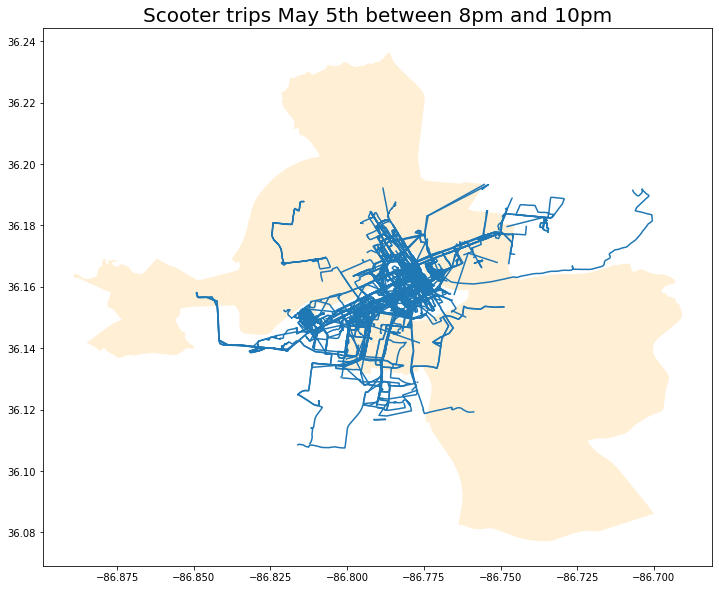

In [92]:
ax = downtown.plot(figsize = (12, 12), color = 'papayawhip')
may_cinco_geo.plot(ax=ax)
plt.title('Scooter trips May 5th between 8pm and 10pm', fontsize=20)

#plt.scatter(y='startLatitude', x='startLongitude', color='green',data=may_cinco, s=2)
#plt.scatter(y='endLatitude', x= 'endLongitude', color='red', data=may_cinco, s=2)
plt.show();


In [93]:
may_12=may_trip_duration.query('startDate < "2019-05-13" & startDate >= "2019-05-12" & endDate < "2019-05-13"')
may_12.head()

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt
71065,2019-05-12 00:07:50.643000,Lyft,LFT16,Powered849206,6.591383,2004.59324,2019-05-12 00:00:00,00:01:15.003333,2019-05-12 00:00:00,00:07:50.486666,36.15884,-86.77448,36.15946,-86.77439,"[[36.15884,-86.77448],[36.15883,-86.77442],[36...",2019-05-13 10:57:17.813000
71066,2019-05-12 00:08:16.503000,Lyft,LFT17,Powered158534,6.036917,2109.58012,2019-05-12 00:00:00,00:02:14.196666,2019-05-12 00:00:00,00:08:16.410000,36.17824,-86.78696,36.17350,-86.78546,"[[36.17824,-86.78696],[36.17784,-86.78669],[36...",2019-05-13 10:57:17.853000
71068,2019-05-12 00:08:46.290000,Bird,BRD4639,Powered9Q272,8.000000,1640.42000,2019-05-12 00:00:00,00:02:11.293333,2019-05-12 00:00:00,00:10:40.656666,36.15130,-86.79670,36.15050,-86.80150,"[[36.151389,-86.796697],[36.15219,-86.797482],...",2019-05-13 05:30:26.770000
71077,2019-05-12 00:08:46.290000,Bird,BRD4640,PoweredWJVGG,9.000000,3280.84000,2019-05-12 00:00:00,00:01:44.476666,2019-05-12 00:00:00,00:10:39.270000,36.15120,-86.79660,36.15040,-86.80140,"[[36.151367,-86.796647],[36.15146,-86.796959],...",2019-05-13 05:30:26.800000
71087,2019-05-12 00:10:29.567000,Lyft,LFT23,Powered046678,9.083083,1633.85832,2019-05-12 00:00:00,00:01:24.493333,2019-05-12 00:00:00,00:10:29.476666,36.15887,-86.77514,36.15985,-86.77491,"[[36.15887,-86.77514],[36.15892,-86.77509],[36...",2019-05-13 10:57:18.040000


In [94]:
may_12_time=may_12.query('startTime >= "20:00:00" & endTime <="22:00:00"')
may_12_time.head()

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt
76053,2019-05-12 20:04:41.420000,Bird,BRD1879,PoweredR8DM1,6.000000,1968.50400,2019-05-12 00:00:00,20:00:32.996666,2019-05-12 00:00:00,20:06:35.686666,36.16000,-86.77880,36.16010,-86.78370,"[[36.160525,-86.778814],[36.15905,-86.782002],...",2019-05-13 05:31:25.253000
76084,2019-05-12 20:09:41.667000,Bird,BRD1901,Powered5ZVXC,8.000000,2624.67200,2019-05-12 00:00:00,20:01:35.690000,2019-05-12 00:00:00,20:09:55.346666,36.16600,-86.77800,36.16160,-86.77580,"[[36.166154,-86.777889],[36.165824,-86.778102]...",2019-05-13 05:31:25.583000
76104,2019-05-12 20:13:26.853000,Lyft,LFT1581,Powered405803,9.737267,3694.22584,2019-05-12 00:00:00,20:03:42.523333,2019-05-12 00:00:00,20:13:26.760000,36.15479,-86.77706,36.15095,-86.78373,"[[36.15479,-86.77706],[36.15473,-86.77708],[36...",2019-05-13 10:58:20.590000
76105,2019-05-12 20:13:41.630000,Lyft,LFT1582,Powered972276,9.255067,2585.30192,2019-05-12 00:00:00,20:04:26.200000,2019-05-12 00:00:00,20:13:41.503333,36.15648,-86.77434,36.15467,-86.77458,"[[36.15648,-86.77434],[36.15643,-86.77429],[36...",2019-05-13 10:58:20.620000
76135,2019-05-12 20:14:23.260000,Lyft,LFT1584,Powered623986,10.654100,3589.23896,2019-05-12 00:00:00,20:03:43.903333,2019-05-12 00:00:00,20:14:23.150000,36.15477,-86.77698,36.15090,-86.78373,"[[36.15477,-86.77698],[36.1548,-86.77704],[36....",2019-05-13 10:58:20.680000


In [95]:
may_12_time_sample = may_12_time.sample(20)

In [96]:
m = folium.Map([36.161278209287914, -86.77756457127047], zoom_start=11)
for _, row in may_12_time_sample.iterrows():
              
    trip = str(row['tripRecordNum'])
    scooter_id = str(row['sumdID'])
    start_loc = [row['startLatitude'],row['startLongitude']]
    start_time = str(row['startTime'])
    
    start_marker = folium.Marker(location=start_loc, 
                popup = scooter_id + ': ' + trip + '<br/>' + start_time,
                    icon = folium.Icon(color='green'))
    start_marker.add_to(m)
    
   
    folium.Marker([row['endLatitude'], row['endLongitude']],
                       icon=folium.Icon(color='red')).add_to(m)
    
    folium.PolyLine([[row['startLatitude'], row['startLongitude']],
                    [row['endLatitude'], row['endLongitude']]], color="red").add_to(m)


folium.GeoJson(downtown).add_to(m)
m

In [97]:
def build_LineString(string):
    coord_list = json.loads(string)
    if len(coord_list) <=1:
        return np.NaN
    else:
        try:
            return LineString([Point(float(lng), float(lat)) for lat, lng in coord_list])
        except:
            print(string)
            raise

In [98]:
may_12_time['geometry'] = may_12_time.tripRoute.apply(build_LineString)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [99]:
may_12_time=may_12_time.loc[may_12_time.geometry.notna()]

In [100]:
may_12_time_geo=gpd.GeoDataFrame(may_12_time,crs=downtown.crs, geometry=may_12_time.geometry)

In [101]:
may_12_time_geo.head()

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt,geometry
76053,2019-05-12 20:04:41.420000,Bird,BRD1879,PoweredR8DM1,6.000000,1968.50400,2019-05-12 00:00:00,20:00:32.996666,2019-05-12 00:00:00,20:06:35.686666,36.16000,-86.77880,36.16010,-86.78370,"[[36.160525,-86.778814],[36.15905,-86.782002],...",2019-05-13 05:31:25.253000,"LINESTRING (-86.778814 36.160525, -86.78200200..."
76084,2019-05-12 20:09:41.667000,Bird,BRD1901,Powered5ZVXC,8.000000,2624.67200,2019-05-12 00:00:00,20:01:35.690000,2019-05-12 00:00:00,20:09:55.346666,36.16600,-86.77800,36.16160,-86.77580,"[[36.166154,-86.777889],[36.165824,-86.778102]...",2019-05-13 05:31:25.583000,"LINESTRING (-86.777889 36.166154, -86.778102 3..."
76104,2019-05-12 20:13:26.853000,Lyft,LFT1581,Powered405803,9.737267,3694.22584,2019-05-12 00:00:00,20:03:42.523333,2019-05-12 00:00:00,20:13:26.760000,36.15479,-86.77706,36.15095,-86.78373,"[[36.15479,-86.77706],[36.15473,-86.77708],[36...",2019-05-13 10:58:20.590000,"LINESTRING (-86.77706000000001 36.15479, -86.7..."
76105,2019-05-12 20:13:41.630000,Lyft,LFT1582,Powered972276,9.255067,2585.30192,2019-05-12 00:00:00,20:04:26.200000,2019-05-12 00:00:00,20:13:41.503333,36.15648,-86.77434,36.15467,-86.77458,"[[36.15648,-86.77434],[36.15643,-86.77429],[36...",2019-05-13 10:58:20.620000,"LINESTRING (-86.77434 36.15648, -86.7742899999..."
76135,2019-05-12 20:14:23.260000,Lyft,LFT1584,Powered623986,10.654100,3589.23896,2019-05-12 00:00:00,20:03:43.903333,2019-05-12 00:00:00,20:14:23.150000,36.15477,-86.77698,36.15090,-86.78373,"[[36.15477,-86.77698],[36.1548,-86.77704],[36....",2019-05-13 10:58:20.680000,"LINESTRING (-86.77697999999999 36.15477, -86.7..."


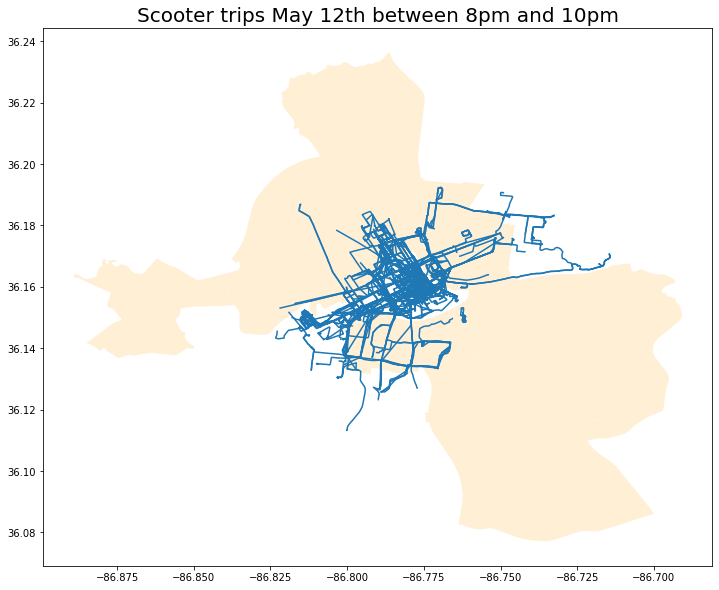

In [102]:
ax = downtown.plot(figsize = (12, 12), color = 'papayawhip')
may_12_time_geo.plot(ax=ax)
plt.title('Scooter trips May 12th between 8pm and 10pm', fontsize=20)

#plt.scatter(y='startLatitude', x='startLongitude', color='green',data=may_cinco, s=2)
#plt.scatter(y='endLatitude', x= 'endLongitude', color='red', data=may_cinco, s=2)
plt.show();


In [103]:
july_df = pd.read_csv('./scooter_data/july_trip.csv')
july_df.head()

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt
0,2019-07-01 00:02:52.213000,Bird,BRD5179,PoweredZSHKJ,2.0,0.0,2019-07-01 00:00:00,00:01:32.290000,2019-07-01 00:00:00,00:03:55.966666,36.1775,-86.7516,36.1778,-86.7514,"[[36.177438,-86.751861],[36.177425,-86.751987]...",2019-07-02 05:30:18.333000
1,2019-07-01 00:02:52.213000,Bird,BRD5177,Powered22JF6,0.0,0.0,2019-07-01 00:00:00,00:02:38.640000,2019-07-01 00:00:00,00:02:54.406666,36.1627,-86.7711,36.1627,-86.7711,"[[36.162718,-86.771102],[36.162718,-86.771102]]",2019-07-02 05:30:18.273000
2,2019-07-01 00:02:52.213000,Bird,BRD5176,Powered22JF6,1.0,0.0,2019-07-01 00:00:00,00:03:04.333333,2019-07-01 00:00:00,00:03:37.680000,36.1627,-86.7713,36.1627,-86.7713,"[[36.162734,-86.77122],[36.162706,-86.771325],...",2019-07-02 05:30:18.243000
3,2019-07-01 00:02:52.213000,Bird,BRD5178,PoweredIB2CC,1.0,0.0,2019-07-01 00:00:00,00:02:06.963333,2019-07-01 00:00:00,00:03:25.766666,36.1525,-86.7988,36.1525,-86.7988,"[[36.152499,-86.798708]]",2019-07-02 05:30:18.303000
4,2019-07-01 00:02:52.213000,Bird,BRD5180,PoweredW4G7R,2.0,0.0,2019-07-01 00:00:00,00:01:19.843333,2019-07-01 00:00:00,00:02:53.976666,36.1578,-86.7760,36.1575,-86.7758,"[[36.157523,-86.775794]]",2019-07-02 05:30:18.363000


In [104]:
july_trip = july_df.query('tripDistance > 1320')
july_trip.head()

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt
5,2019-07-01 00:03:52.060000,Lyft,LFT7,Powered840423,3.716183,2375.32816,2019-07-01 00:00:00,00:00:08.963333,2019-07-01 00:00:00,00:03:51.933333,36.14933,-86.79760,36.15265,-86.79706,"[[36.14933,-86.7976],[36.14942,-86.7975],[36.1...",2019-07-02 09:34:36.953000
10,2019-07-01 00:08:01.777000,Lyft,LFT11,Powered414680,6.297550,5488.84532,2019-07-01 00:00:00,00:01:43.776666,2019-07-01 00:00:00,00:08:01.630000,36.15249,-86.79472,36.13892,-86.80048,"[[36.15249,-86.79472],[36.15235,-86.79489],[36...",2019-07-02 09:34:37.087000
11,2019-07-01 00:08:15.163000,Lyft,LFT12,Powered635347,6.776617,5383.85844,2019-07-01 00:00:00,00:01:28.440000,2019-07-01 00:00:00,00:08:15.036666,36.15234,-86.79483,36.13895,-86.80047,"[[36.15234,-86.79483],[36.15219,-86.79494],[36...",2019-07-02 09:34:37.120000
12,2019-07-01 00:09:50.063000,Lyft,LFT15,Powered883367,7.443667,4379.92140,2019-07-01 00:00:00,00:02:23.333333,2019-07-01 00:00:00,00:09:49.953333,36.13676,-86.80596,36.13664,-86.80535,"[[36.13676,-86.80596],[36.13695,-86.80611],[36...",2019-07-02 09:34:37.217000
14,2019-07-01 00:11:17.113000,Lyft,LFT18,Powered840423,4.432367,3851.70616,2019-07-01 00:00:00,00:06:50.833333,2019-07-01 00:00:00,00:11:16.776666,36.15265,-86.79709,36.14805,-86.80795,"[[36.15265,-86.79709],[36.15253,-86.79731],[36...",2019-07-02 09:34:37.320000


In [105]:
july_trip_duration=july_trip.query('5<=tripDuration<=120')
july_trip_duration.head()

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt
10,2019-07-01 00:08:01.777000,Lyft,LFT11,Powered414680,6.297550,5488.84532,2019-07-01 00:00:00,00:01:43.776666,2019-07-01 00:00:00,00:08:01.630000,36.15249,-86.79472,36.13892,-86.80048,"[[36.15249,-86.79472],[36.15235,-86.79489],[36...",2019-07-02 09:34:37.087000
11,2019-07-01 00:08:15.163000,Lyft,LFT12,Powered635347,6.776617,5383.85844,2019-07-01 00:00:00,00:01:28.440000,2019-07-01 00:00:00,00:08:15.036666,36.15234,-86.79483,36.13895,-86.80047,"[[36.15234,-86.79483],[36.15219,-86.79494],[36...",2019-07-02 09:34:37.120000
12,2019-07-01 00:09:50.063000,Lyft,LFT15,Powered883367,7.443667,4379.92140,2019-07-01 00:00:00,00:02:23.333333,2019-07-01 00:00:00,00:09:49.953333,36.13676,-86.80596,36.13664,-86.80535,"[[36.13676,-86.80596],[36.13695,-86.80611],[36...",2019-07-02 09:34:37.217000
19,2019-07-01 00:12:52.437000,Bird,BRD5286,PoweredI5BFF,13.000000,5249.34400,2019-07-01 00:00:00,00:01:05.206666,2019-07-01 00:00:00,00:14:11.033333,36.17830,-86.77730,36.17820,-86.77480,"[[36.178357,-86.777234],[36.178172,-86.777141]...",2019-07-02 05:30:19.463000
20,2019-07-01 00:12:52.437000,Bird,BRD5276,PoweredPQLXE,5.000000,1968.50400,2019-07-01 00:00:00,00:10:16.383333,2019-07-01 00:00:00,00:14:50.046666,36.16420,-86.76950,36.16000,-86.77540,"[[36.164204,-86.76942],[36.164141,-86.769547],...",2019-07-02 05:30:19.160000


In [106]:
july_4 = july_trip_duration.query('startDate < "2019-07-05" & startDate >= "2019-07-04" & endDate < "2019-07-05"')
july_4.head()

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt
10735,2019-07-04 00:06:08.743000,Bird,BRD2833,PoweredKP479,7.0,8202.10000,2019-07-04 00:00:00,00:00:33.490000,2019-07-04 00:00:00,00:07:57.330000,36.173800,-86.756400,36.176900,-86.751500,"[[36.173878,-86.756346],[36.174015,-86.756398]...",2019-07-05 05:30:17.320000
10738,2019-07-04 00:06:08.743000,Bird,BRD2830,PoweredVW7GJ,5.0,3608.92400,2019-07-04 00:00:00,00:01:34.033333,2019-07-04 00:00:00,00:06:41.636666,36.151800,-86.781100,36.151900,-86.781200,"[[36.151915,-86.781101]]",2019-07-05 05:30:17.227000
10740,2019-07-04 00:06:08.743000,Bird,BRD2832,PoweredL1VPH,7.0,2952.75600,2019-07-04 00:00:00,00:00:53.153333,2019-07-04 00:00:00,00:07:56.220000,36.173600,-86.756900,36.174000,-86.756500,"[[36.174079,-86.756441],[36.174079,-86.756441]...",2019-07-05 05:30:17.290000
10758,2019-07-04 00:10:58.580000,SPIN,SPI1,Powered2741171,9.0,2552.49352,2019-07-04 00:00:00,00:00:00,2019-07-04 00:00:00,00:08:02,36.163252,-86.791267,36.162269,-86.782695,"[[36.162269320372644,-86.782694645306819],[36....",2019-07-05 10:32:38.653000
10768,2019-07-04 00:11:09.013000,Bird,BRD2865,PoweredJ6DAH,10.0,3608.92400,2019-07-04 00:00:00,00:02:14.650000,2019-07-04 00:00:00,00:11:46.676666,36.158500,-86.772000,36.166100,-86.777400,"[[36.158582,-86.771952],[36.158715,-86.771917]...",2019-07-05 05:30:17.920000


In [107]:
july_4_time=july_4.query('startTime >= "20:00:00" & endTime <="22:00:00"')
july_4_time.head()

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt
14341,2019-07-04 20:07:02.167000,Bird,BRD2696,PoweredRQHRV,5.0,6561.680000,2019-07-04 00:00:00,20:02:21.066666,2019-07-04 00:00:00,20:07:18.870000,36.160600,-86.789600,36.156500,-86.787400,"[[36.160394,-86.789929],[36.156577,-86.787366]...",2019-07-05 05:31:28.850000
14348,2019-07-04 20:07:05,Gotcha,GOT48,Powered1641,9.0,2488.303885,2019-07-04 00:00:00,20:07:09,2019-07-04 00:00:00,20:16:09,36.156735,-86.775673,36.160362,-86.781571,"[[""36.156870000000005"",""-86.77568000000001""],[...",2019-07-05 07:07:42.897000
14349,2019-07-04 20:07:05,Gotcha,GOT47,Powered1641,9.0,2488.303885,2019-07-04 00:00:00,20:07:09,2019-07-04 00:00:00,20:16:09,36.156735,-86.775673,36.160362,-86.781571,"[[""36.156870000000005"",""-86.77568000000001""],[...",2019-07-05 07:07:41.810000
14357,2019-07-04 20:11:44.977000,SPIN,SPI432,Powered5919776,5.0,1850.393760,2019-07-04 00:00:00,20:06:47,2019-07-04 00:00:00,20:10:59,36.149504,-86.814049,36.147200,-86.808452,"[[36.147200250030849,-86.808451988355444],[36....",2019-07-05 10:32:54.333000
14359,2019-07-04 20:11:44.977000,SPIN,SPI433,Powered1487476,5.0,1955.380640,2019-07-04 00:00:00,20:06:57,2019-07-04 00:00:00,20:11:00,36.149530,-86.814179,36.147303,-86.808146,"[[36.147303180802751,-86.808146294287226],[36....",2019-07-05 10:32:54.367000


In [108]:
july_4_time['geometry'] = july_4_time.tripRoute.apply(build_LineString)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [109]:
july_4_time=july_4_time.loc[july_4_time.geometry.notna()]

In [110]:
july_4_time_geo=gpd.GeoDataFrame(july_4_time,crs=downtown.crs, geometry=july_4_time.geometry)

In [111]:
july_4_time_geo.head()

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt,geometry
14341,2019-07-04 20:07:02.167000,Bird,BRD2696,PoweredRQHRV,5.0,6561.680000,2019-07-04 00:00:00,20:02:21.066666,2019-07-04 00:00:00,20:07:18.870000,36.160600,-86.789600,36.156500,-86.787400,"[[36.160394,-86.789929],[36.156577,-86.787366]...",2019-07-05 05:31:28.850000,"LINESTRING (-86.789929 36.160394, -86.78736600..."
14348,2019-07-04 20:07:05,Gotcha,GOT48,Powered1641,9.0,2488.303885,2019-07-04 00:00:00,20:07:09,2019-07-04 00:00:00,20:16:09,36.156735,-86.775673,36.160362,-86.781571,"[[""36.156870000000005"",""-86.77568000000001""],[...",2019-07-05 07:07:42.897000,"LINESTRING (-86.77568000000001 36.15687, -86.7..."
14349,2019-07-04 20:07:05,Gotcha,GOT47,Powered1641,9.0,2488.303885,2019-07-04 00:00:00,20:07:09,2019-07-04 00:00:00,20:16:09,36.156735,-86.775673,36.160362,-86.781571,"[[""36.156870000000005"",""-86.77568000000001""],[...",2019-07-05 07:07:41.810000,"LINESTRING (-86.77568000000001 36.15687, -86.7..."
14357,2019-07-04 20:11:44.977000,SPIN,SPI432,Powered5919776,5.0,1850.393760,2019-07-04 00:00:00,20:06:47,2019-07-04 00:00:00,20:10:59,36.149504,-86.814049,36.147200,-86.808452,"[[36.147200250030849,-86.808451988355444],[36....",2019-07-05 10:32:54.333000,LINESTRING (-86.80845198835544 36.147200250030...
14359,2019-07-04 20:11:44.977000,SPIN,SPI433,Powered1487476,5.0,1955.380640,2019-07-04 00:00:00,20:06:57,2019-07-04 00:00:00,20:11:00,36.149530,-86.814179,36.147303,-86.808146,"[[36.147303180802751,-86.808146294287226],[36....",2019-07-05 10:32:54.367000,LINESTRING (-86.80814629428723 36.147303180802...


### Row id 278 had high precision (lots of digits after the decimal) in one of the coordinates in the linestring and would not plot, so we dropped it.

In [112]:
july_4_time_geo= july_4_time_geo.reset_index()
july_4_time_geo=july_4_time_geo.drop(278)

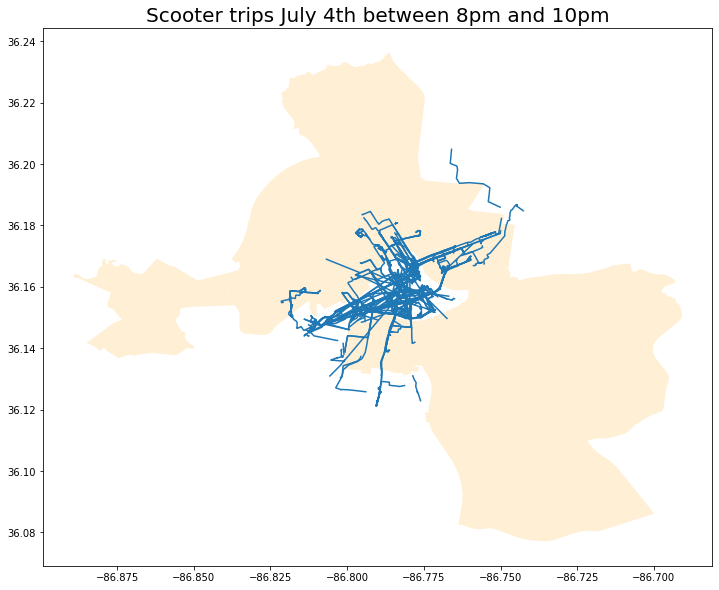

In [113]:
ax = downtown.plot(figsize = (12, 12), color = 'papayawhip')
july_4_time_geo.plot(ax=ax)
plt.title('Scooter trips July 4th between 8pm and 10pm', fontsize=20)

#plt.scatter(y='startLatitude', x='startLongitude', color='green',data=may_cinco, s=2)
#plt.scatter(y='endLatitude', x= 'endLongitude', color='red', data=may_cinco, s=2)
plt.show();

In [114]:
july_11=july_trip_duration.query('startDate < "2019-07-12" & startDate >= "2019-07-11" & endDate < "2019-07-12"')
july_11.head()

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt
44713,2019-07-11 00:18:48.777000,Bird,BRD1523,Powered49B9H,14.000000,7545.93200,2019-07-11 00:00:00,00:06:10.476666,2019-07-11 00:00:00,00:19:48.243333,36.159000,-86.769100,36.16160,-86.775300,"[[36.159067,-86.769059],[36.159661,-86.769749]...",2019-07-12 05:30:58.473000
44716,2019-07-11 00:18:48.777000,Bird,BRD1522,PoweredLAQZM,13.000000,7545.93200,2019-07-11 00:00:00,00:06:41.023333,2019-07-11 00:00:00,00:20:01.793333,36.163800,-86.779700,36.18040,-86.791500,"[[36.163895,-86.779669],[36.180446,-86.791454]]",2019-07-12 05:30:58.443000
44717,2019-07-11 00:19:37.640000,Lyft,LFT23,Powered511914,15.913550,6863.51728,2019-07-11 00:00:00,00:03:42.696666,2019-07-11 00:00:00,00:19:37.510000,36.186730,-86.813890,36.18876,-86.814180,"[[36.18673,-86.81389],[36.18671,-86.81401],[36...",2019-07-12 09:57:14.143000
44718,2019-07-11 00:20:52.273000,Lyft,LFT24,Powered587219,6.694233,1742.12604,2019-07-11 00:00:00,00:14:10.323333,2019-07-11 00:00:00,00:20:51.976666,36.151120,-86.796500,36.15340,-86.794810,"[[36.15112,-86.7965],[36.15109,-86.79645],[36....",2019-07-12 09:57:14.180000
44719,2019-07-11 00:22:23.367000,SPIN,SPI2,Powered2870006,16.000000,9097.76932,2019-07-11 00:00:00,00:03:05,2019-07-11 00:00:00,00:18:14,36.161513,-86.776074,36.15091,-86.804004,"[[36.1509097460994,-86.8040035386447],[36.1510...",2019-07-12 10:50:00.167000


In [115]:
july_11_time=july_11.query('startTime >= "20:00:00" & endTime <="22:00:00"')
july_11_time.head()

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt
46562,2019-07-11 20:10:04.410000,Bird,BRD1255,Powered2UL1U,5.000000,1640.42000,2019-07-11 00:00:00,20:05:45.270000,2019-07-11 00:00:00,20:10:56.283333,36.15050,-86.78150,36.14990,-86.77610,"[[36.15053,-86.781479],[36.150524,-86.781235],...",2019-07-12 05:31:22.617000
46563,2019-07-11 20:10:04.410000,Bird,BRD1258,Powered4J3EF,10.000000,4921.26000,2019-07-11 00:00:00,20:02:21.606666,2019-07-11 00:00:00,20:12:02.406666,36.15820,-86.85010,36.14230,-86.84200,"[[36.158259,-86.85001],[36.158224,-86.850017],...",2019-07-12 05:31:22.710000
46564,2019-07-11 20:10:04.410000,Bird,BRD1256,PoweredZB1FI,7.000000,4265.09200,2019-07-11 00:00:00,20:04:19.043333,2019-07-11 00:00:00,20:10:58.620000,36.16820,-86.78310,36.17450,-86.78760,"[[36.167976,-86.783103],[36.168617,-86.783612]...",2019-07-12 05:31:22.647000
46566,2019-07-11 20:10:04.410000,Bird,BRD1257,PoweredIPXQG,8.000000,5249.34400,2019-07-11 00:00:00,20:04:00.823333,2019-07-11 00:00:00,20:11:40.806666,36.15060,-86.78180,36.15050,-86.78160,"[[36.150538,-86.781708],[36.150579,-86.781557]...",2019-07-12 05:31:22.680000
46568,2019-07-11 20:11:03.587000,Lyft,LFT396,Powered253559,7.521783,2322.83472,2019-07-11 00:00:00,20:03:32.156666,2019-07-11 00:00:00,20:11:03.463333,36.15062,-86.78168,36.14992,-86.77609,"[[36.15062,-86.78168],[36.15058,-86.78159],[36...",2019-07-12 09:57:33.950000


In [116]:
july_11_time['geometry'] = july_11_time.tripRoute.apply(build_LineString)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [117]:
july_11_time=july_11_time.loc[july_11_time.geometry.notna()]

In [118]:
july_11_time_geo=gpd.GeoDataFrame(july_11_time,crs=downtown.crs, geometry=july_11_time.geometry)

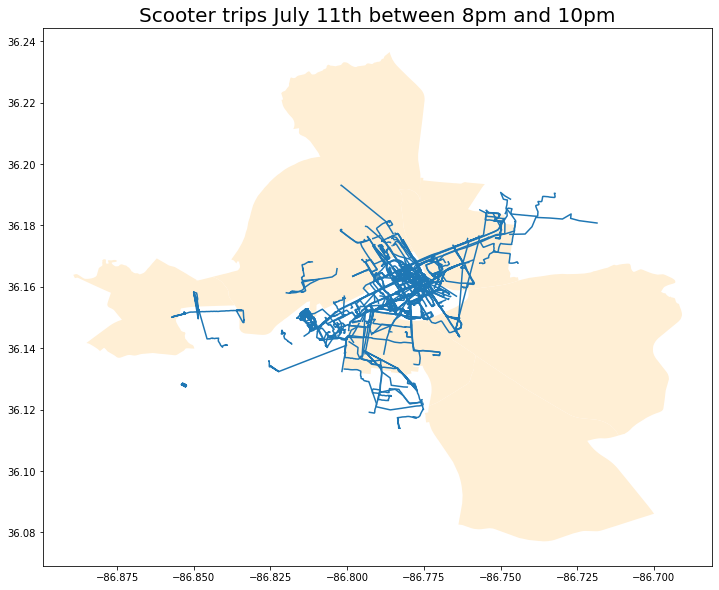

In [119]:
ax = downtown.plot(figsize = (12, 12), color = 'papayawhip')
july_11_time_geo.plot(ax=ax)
plt.title('Scooter trips July 11th between 8pm and 10pm', fontsize=20)

#plt.scatter(y='startLatitude', x='startLongitude', color='green',data=may_cinco, s=2)
#plt.scatter(y='endLatitude', x= 'endLongitude', color='red', data=may_cinco, s=2)
plt.show();